## DRILL: Comparing Clustering Methods

You've seen how these three methods work on three blobs of reasonably separated data. Now go back and change the data. Create more or fewer blobs, and set the blobs closer together or farther apart. Set up at least three different blob configuations, then run the four methods ( 𝑘 -means, mean shift, spectral clustering and affinity propagation) on each one. Write up a report for your mentor where you discuss what you learned about the clustering methods based on their relative performance for your different blob setups.

In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

[[-1.32145035 -3.87486566]
 [-2.19458466 -1.96612945]
 [-2.59081835 -0.75495899]
 ...
 [-0.72534688 -1.07527819]
 [ 0.55614518 -0.29618095]
 [ 1.85898428 -1.52373498]]


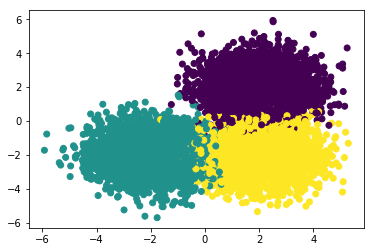

In [18]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    random_state=42)
print(X)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

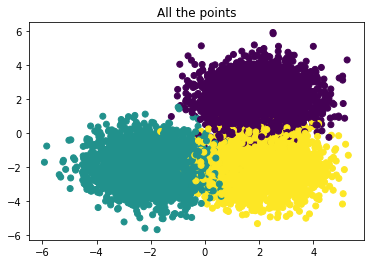

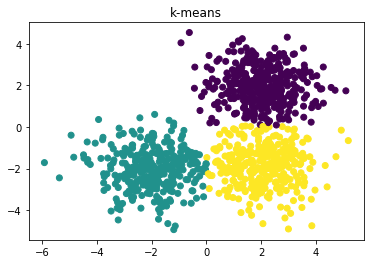

K_MEANS Comparing clusters against the data:
col_0    0    1    2
row_0               
0      352    1    6
1        0  310    5
2       10    9  307

Mean Shift's Number of estimated clusters: 3


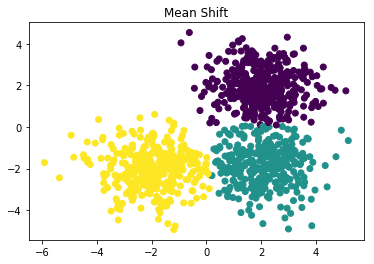

MEAN SHIFT Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      352   10    0
1        1    8  311
2        6  304    8


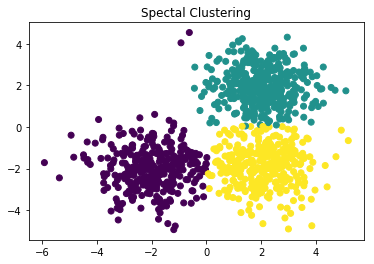

SPECTRAL CLUSTERING Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0        2  350   10
1      310    1    9
2        6    7  305
AFFINITY PROPAGATION Estimated number of clusters: 93


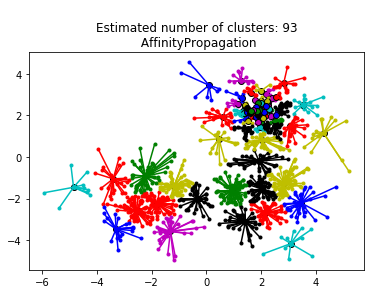

In [34]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[2, 2], [-2, -2], [2, -2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    random_state=42)
#print(X)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('All the points')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)


# k-means
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('k-means')
plt.show()

# Check the solution against the data.
print('K_MEANS Comparing clusters against the data:')
print(pd.crosstab(y_pred, y_train))


# mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("\nMean Shift's Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('MEAN SHIFT Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))



# spectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectal Clustering')
plt.show()

print('SPECTRAL CLUSTERING Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))





# Affinity Propagation
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
#print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('AFFINITY PROPAGATION Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('\nEstimated number of clusters: {}\n AffinityPropagation'.format(n_clusters_))
plt.show()


For these centers, all of the methods of clustering seem to work well. k-means, mean shift, and spectral clustering all produce similar outputs both graphically and with regards to crosstab. Affinity propagation estimated that there were far more clusters than we designed. But it is convenient that we did not have to state that there were three clusters to begin with. The other methods would be much more difficult to use if we did not know that we had three clusters a priori.

Let's try this with our predetermined centers close together

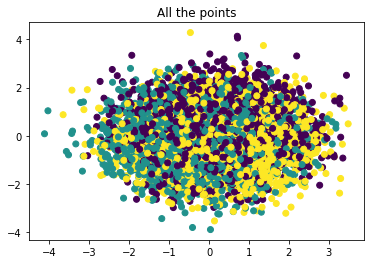

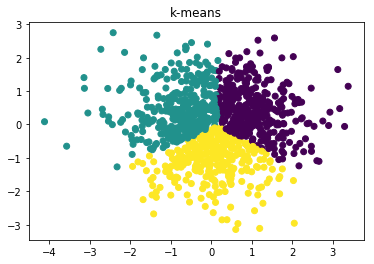

K_MEANS Comparing clusters against the data:
col_0    0    1    2
row_0               
0      136   79  123
1      133  118   93
2       93  123  102

Mean Shift's Number of estimated clusters: 1


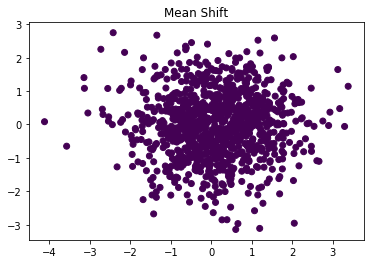

MEAN SHIFT Comparing the assigned categories to the ones in the data:
col_0    0
row_0     
0      362
1      320
2      318


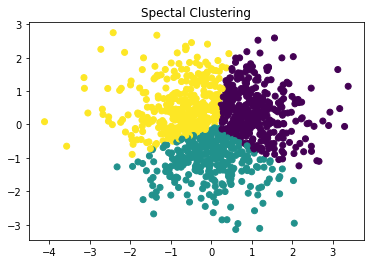

SPECTRAL CLUSTERING Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      136   91  135
1       82  124  114
2      125  100   93
AFFINITY PROPAGATION Estimated number of clusters: 39


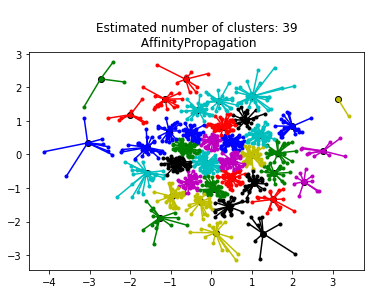

In [35]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[.2, .2], [-.2, -.2], [.2, -.2]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    random_state=42)
#print(X)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('All the points')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)


# k-means
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('k-means')
plt.show()

# Check the solution against the data.
print('K_MEANS Comparing clusters against the data:')
print(pd.crosstab(y_pred, y_train))


# mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("\nMean Shift's Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('MEAN SHIFT Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))



# spectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectal Clustering')
plt.show()

print('SPECTRAL CLUSTERING Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))





# Affinity Propagation
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
#print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('AFFINITY PROPAGATION Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('\nEstimated number of clusters: {}\n AffinityPropagation'.format(n_clusters_))
plt.show()

Things are certainly more messy here. Our blobs are very much on top of eachother, but they have distinct centers. k-means and spectral clustering do alright. They were told that there are 3 centers, so they are somewhat able to partion the data points. Their choice of orientation does not fit our chosen centers well. It would make more sense to have those outputs rotated 60 degrees. If this was done the crosstab results might have one larger number per row rather than two (and only one large number per columns). With only one dominating element per row, we are confident that the algorithm is working well. Mean shift only found one blob. This is very reasonable... and Affinity propagation, once again, found many blobs. In this case I might say mean shift is best. 


Let's try separating the clusters more.

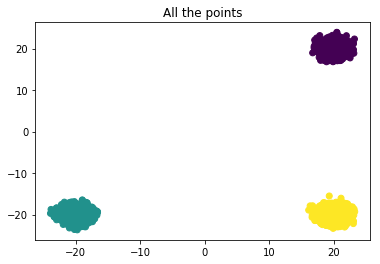

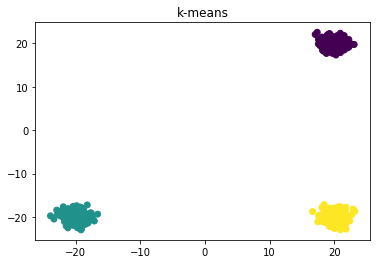

K_MEANS Comparing clusters against the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0  320    0
2        0    0  318

Mean Shift's Number of estimated clusters: 3


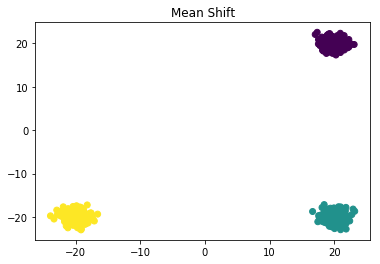

MEAN SHIFT Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      362    0    0
1        0    0  320
2        0  318    0


/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"
/anaconda3/lib/python3.7/site-packages/sklearn/manifold/spectral_embedding_.py:234: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


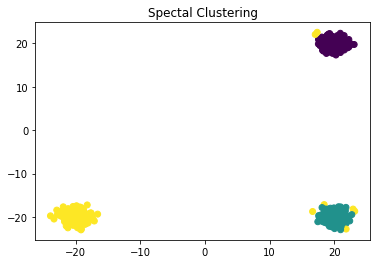

SPECTRAL CLUSTERING Comparing the assigned categories to the ones in the data:
col_0    0    1    2
row_0               
0      360    0    2
1        0    0  320
2        0  313    5


TypeError: object of type 'NoneType' has no len()

In [36]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split

# The coordinates of the centers of our blobs.
centers = [[20, 20], [-20, -20], [20, -20]]

# Make 10,000 rows worth of data with two features representing three
# clusters, each having a standard deviation of 1.
X, y = make_blobs(
    n_samples=10000,
    centers=centers,
    cluster_std=1,
    random_state=42)
#print(X)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title('All the points')
plt.show()

#Divide into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)


# k-means
# Calculate predicted values.
y_pred = KMeans(n_clusters=3, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.title('k-means')
plt.show()

# Check the solution against the data.
print('K_MEANS Comparing clusters against the data:')
print(pd.crosstab(y_pred, y_train))


# mean shift
from sklearn.cluster import MeanShift, estimate_bandwidth

# Here we set the bandwidth. This function automatically derives a bandwidth
# number based on an inspection of the distances among points in the data.
bandwidth = estimate_bandwidth(X_train, quantile=0.2, n_samples=500)

# Declare and fit the model.
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Extract cluster assignments for each data point.
labels = ms.labels_

# Coordinates of the cluster centers.
cluster_centers = ms.cluster_centers_

# Count our clusters.
n_clusters_ = len(np.unique(labels))

print("\nMean Shift's Number of estimated clusters: {}".format(n_clusters_))

plt.scatter(X_train[:, 0], X_train[:, 1], c=labels)
plt.title('Mean Shift')
plt.show()

print('MEAN SHIFT Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,labels))



# spectral clustering
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=3

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters)
sc.fit(X_train)

#Predicted clusters.
predict=sc.fit_predict(X_train)

#Graph results.
plt.scatter(X_train[:, 0], X_train[:, 1], c=predict)
plt.title('Spectal Clustering')
plt.show()

print('SPECTRAL CLUSTERING Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))





# Affinity Propagation
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_train)
#print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('AFFINITY PROPAGATION Estimated number of clusters: {}'.format(n_clusters_))

from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster.
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train[cluster_centers_indices[k]]
    plt.plot(X_train[class_members, 0], X_train[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
             cluster_center[1],
             'o',
             markerfacecolor=col,
             markeredgecolor='k')
    for x in X_train[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('\nEstimated number of clusters: {}\n AffinityPropagation'.format(n_clusters_))
plt.show()

Well, k-means and meanshift worked perfectly for this "obvious" clustering. Spectral clustering did well but had some seven misclassifications. Affinity propagation did not even work. It returned no cluster center indicies. 

# Conclusion

As we can see, certain algorithms work best for certain situations. Mean shift and affinity propagation don't require the number of clusters and an imput, but they can make poor estimations of the numbers of clusters. While not demonstrated here, spectal clustering has the advantage of identifying clusters that are not sphereical. In general, each of these methods will shine in certain circumstances but perform very poorly in others.